## Instructions
- See deadline on the course web page
- This problem set is performed individually. See examination rules on the course web page.
- Students are allowed to discuss together and help each other when solving the problems. However, every student must understand and be able to explain his/her submitted solution. Plagiarism is not allowed (submissions will be both manually and automatically monitored).
- The two notebooks for each problem set contain a number of basic and extra problems; you can choose which and how many to work on.
- Many problems are automatically graded using `assert` statements. You should check that your code passes these statements without raising an `AssertionError`. Note that there might be additional, hidden tests that must be passed for full credit. In addition, some tasks are either completely manually graded or part-automatic/part-manual.
- Note that grading is performed in the teacher's python environment, which is based on the conda `environment.yml` file in the course github repo. Please avoid using additional python modules (such as `plotly`) as this might cause automatic tests to fail.

- **Important:** Hand-in is performed through the following actions:
  - Make sure to always complete **Task 0** in the header part of the notebook and that this part does not raise any `AssertionError`(s). 
  - Upload your solution in the form of your edited version of this jupyter notebook via the appropriate module in Canvas.
  - The name of the uploaded file **must be the same as the original one**!
  
  Note that the hand-in might not be automatically graded if you have changed the name of the uploaded file.

- Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

- Make sure that the **run time is smaller than a few minutes**. If needed you might have to reduce some computational tasks; e.g. by decreasing the number of grid points or sampling steps. Please ask the supervisors if you are uncertain about the run time. 

- Your solutions are usually expected where it says `YOUR CODE HERE` or <font color="red">"PLEASE WRITE YOUR ANSWER HERE"</font>.

### Task 0 
#### (0 points)
Fill your personal details in the dictionary 'student' with the following key/value pairs:
- **Lastname**: Your lastname as a string
- **Firstname**: Your firstname as a string
- **DOB-year**: The year for your date of birth as a four-digit integer
- **DOB-month**: The month for your date of birth as an integer (1-12)
- **DOB-day**: The year for your date of birth as an integer (1-31)
- **CID**: Your Chalmers login ID as a string

In [ ]:
student={}
# Update the values below. Note the formats.
student['Lastname']='name_here'  # string
student['Firstname']='name_here' # string
student['CID']='cid_here'        # string
student['DOB-year']=1000         # four-digit integer
student['DOB-month']=0           # integer in the range [1, 12]
student['DOB-day']=0             # integer in the range [1, 31]

# YOUR CODE HERE

In [ ]:
for key in ['Lastname', 'Firstname','CID']:
    assert type(student[key]) is str, f'{key} is wrong type.'
    assert student[key] not in ['name_here','cid_here'],\
        f'Fill your {key} as a string.'

for key in ['DOB-year', 'DOB-month','DOB-day']:
    assert type(student[key]) is int, f'{key} is wrong type.'

assert (student['DOB-year'] > 1900 and student['DOB-year'] < 2100)
assert student['DOB-month'] in range(1,13), \
    'DOB month should be an integer in the range [1, 12]'
assert student['DOB-day'] in range(1,32), \
    'DOB day should be an integer in the range [1, 31]'

By changing the below boolean variable `student_self_assessment` to `True` you attest that:
1. All handed in solutions were produced by yourself in the sense that you understand your solutions and should be able to explain and discuss them with a peer or with a teacher.
2. That discussions with your peers are allowed, also concerning approaches to solve the problem sets, but that direct plagiarism is not allowed and that you must reach your own understanding of submitted solutions according to the definition in the previous point.

In [ ]:
student_self_assessment = False

# YOUR CODE HERE

In [ ]:
assert student_self_assessment == True, 'You must assert the individual solution statements.'

# Problem Set 3
## Extra problems
### Learning from data [TIF285], Chalmers, Fall 2022

Last revised: 26-Sep-2022 by Christian Forssén [christian.forssen@chalmers.se]

In [ ]:
import os
# Data files are stored in
DATA_DIR = "DataFiles/"

if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

## Problem 5 (extra): Bayesian optimization
### (3 points)
*You should have solved problem 3 to get some acquaintance with Gaussian Processes before doing this problem.*

In [ ]:
# Import modules
#
%matplotlib inline
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
import GPy

# Additional module import statements if needed
# YOUR CODE HERE

### A univariate minimization problem

Try to minimize the function
$$
f(x) = \sin(6 x) + 0.2 x^2 - 0.7 x
$$
on the interval $x \in [-5,5]$.

The aim is to find the position of the minimum $x^*$ to within $\pm 0.05$ under the constraint that we would like to make as few function evaluations as possible.

### Task 1: Using "standard" optimization methods

a. **Plot the true function and indicate the position of the minimum**
Save the position of the *global* minimum in the variable `xtrue_min` (with at least two significant decimals)

In [ ]:
xmin =  -5.
xmax =  5.
X_domain = np.linspace(xmin,xmax,10000)

# YOUR CODE HERE

b. Find the minimum using `scipy.optimize.minimize` with `method='Nelder-Mead'`. 
* Choose the starting point randomly from a uniform pdf $U(-5,5)$. 
* Repeat one hundred times. **Do you always get the same minimum?**
* More specifically, set the tolerance of the optimizer to `tol=0.01` and check for success by the criterion $|x^* - x^*_\mathrm{opt}| < 0.05$, where $x^*_\mathrm{opt}$ is the result from the optimizer.
* Be quantitative about the average number of function evaluations that are needed per successful optimization. Compute the ratio of the total number of function evaluations number (summed over the 100 tries with different starting points) with the number of successful attempts.  
  *Hint*: The number of function evaluations from a `scipy.optimize.minimize` result is returned in the ``OptimizeResult`` object. 

In [ ]:
# YOUR CODE HERE

### Task 2. Build your own BayesOpt algorithm

You will now implement a very different approach to minimize an objective function (this is a conventional name for the function that we are trying to minimize or maximize). The approach is known as **Bayesian optimization** and the basic idea is the following:
* Select a few random points, evaluate the unknown function at these samples and build a **statistical model** for the function output in the entire input range based on this data (usually a Gaussian Process model).
* Make a decision which point to sample next based on a so called **acquisition function** evaluated from the statistical model. This decision will incorporate our current knowledge about the function including our uncertainty for its value in different regions.
* Improve the statistical model using the new sample. Continue sampling new points according to the acquisition function.
* If done correctly, this approach will balance **exploration** of new regions (with uncertain outputs, that might contain the minimum) and **exploitation** of the region that is currently most promising.
* Very importantly, this method also works when you are dealing with **noisy objective functions**, i.e. when your "measurement" of its value at a new point in parameter space contains some random noise.

Your task is to repeat the above minimization with **your own Bayesian Optimization algorithm**, that should be assembled as described below. Bayesian optimization algoritms are built into libraries such as `Scikit-optimize` and `GPyOpt`, but we will build our own simple version using functions from `numpy`, `scipy`, and `GPy` (for building the statistical model).

The pseudo-code for BayesOpt is the following (see specific hints for your implementation at the end):
1. pick starting points $\mathbf{x}^{(1)},\mathbf{x}^{(2)},\ldots \mathbf{x}^{(k)}$, where $k \geq 2$
1. evaluate the objective function $f(\mathbf{x})$ to obtain $y^{(i)}=f(\mathbf{x}^{(i)})$ for $i=1,\ldots,k$
1. initialize a data vector $\mathcal{D}_k = \left\{(\mathbf{x}^{(i)},y^{(i)})\right\}_{i=1}^k$
1. select a statistical model for $f(\mathbf{x})$
1. **For** {$n=k+1,k+2,\ldots$}
   1.    select $\mathbf{x}^{(n)}$ by optimizing the acquisition function: $\mathbf{x}^{(n)} = \underset{\mathbf{x}}{\text{arg max}}\, \mathcal{A}(\mathbf{x}|\mathcal{D}_{n-1})$
   1.    evaluate the objective function to obtain $y^{(n)}=f(\mathbf{x}^{(n)})$
   1.    augment the data vector $\mathcal{D}_n = \left\{\mathcal{D}_{n-1} , (\mathbf{x}^{(n)},y^{(n)})\right\}$
   1.    update the statistical model for $f(\mathbf{x})$
1. **end for**

   Check for the minimum in the data vector that has been collected (note that it doesn't necessarily have to be the last sample).


**Hints:**
* You have to implement all steps in the above pseudo-code.
* You can try with $k=2$ starting points.
* For the statistical model you can use `GPy`. Follow the examples from the lectures and the exercise notebook.
* Any knowledge about the objective function should be built into the covariance function. Let us assume that we don't have much information and that we use a standard RBF kernel.
* It is recommended to constrain the RBF lengthscale so that it doesn't become unrealistic small. With the `GPy` model called `model`, such a constraint can be imposed using `model['rbf.lengthscale'].constrain_bounded(.1,10)`.
* Implement the so called Lower Confidence Bound (LCB) acquisition function for use in step 5A. Then, the acquisition function is simply: $\mathcal{A}(\boldsymbol{x}; | \mathcal{D}_{n-1}) = -\mu(\boldsymbol{x}) + \beta \sigma(\boldsymbol{x})$, where
  * $\mu(\boldsymbol{x})$ is the mean of the GP model trained with the data $\mathcal{D}_{n-1})$.
  * $\sigma(\boldsymbol{x})$ is the standard deviation of the GP model trained with the data $\mathcal{D}_{n-1})$.
  * $\beta$ is another hyperparameter for tuning the preference for exploring unknown regions. You can set $\beta = 2$.
* Remember that the statistical model has to be updated (the hyperparameters re-optimized) at step 5D.

#### Tasks
* Implement the BayesOpt minimizer
* Assume that you are allowed a total of 100 function evaluations ($k$ of them for the starting points and $100-k$ in the loop). Are you able to find the minimum to within $\pm 0.05$?
* Plot the final statistical model together with the true function. Show which points that have been explored.
* Plot also the convergence of the minimum value $\min(y_n)$ as a function of the iteration number $n \in \{1, \ldots, 100\}$.

In [ ]:
# Initialize the Bayesian Optimization by performing steps 1-4.
# You might want to try with different seeds.
#
# YOUR CODE HERE

In [ ]:
# Perform the loop, i.e. repeat steps 5A-D 100-k times
#
# For better performance of the BayesOptimizer it is desirable to shift the grid in each iteration
npoints=10000
xrange=xmax-xmin
dx=xrange/npoints
X_domain = np.linspace(xmin+dx*np.random.uniform(),xmax,10000).reshape(-1,1)

#
# YOUR CODE HERE

In [ ]:
# Print the final result. Did you find the minimum to within 0.02?
# Print also the hyperparameters of the final statistical model
# (hint: `print(model)` if model is a GPy model)
#
# Make three plots: 
# 1. The statistical model after the final sample.
#    Show which points that have been sampled during the run.
# 2. The acquisition function after the final sample.
# 3. The minimum function output as a function of the iteration number.
#    (i.e. what is the "best" output that has been found so far?)  
#    Compare to the true minimum of f(x)
#
#
# YOUR CODE HERE

## Problem 6 (extra): A simple Bayesian binary classifier
### (4 points)
*You should have solved problem 4 before doing this problem.*

In [63]:
# Import modules
#
%matplotlib inline
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
import sklearn
import seaborn as sns
import emcee
from corner import corner

Create a bayesian binary classifier that can take $(E,|m|)$ as input data and predicts a binary label (0=below $T_c$, 1=above $T_c$). 
* Use only high- and low-tempterature data for training (so that predictions for intermediate temperature data should be more difficult). Use normalized data as in Task 4.
* The weights (and bias) of the single neuron binary classifier will be described by pdf:s that we will sample from using MCMC.
* Use a Gaussian prior on the two weights and the bias (with ``weight decay'' $\sigma = 1.0)$.
* Construct the (log) likelihood as in logistic regression (i.e. as used in Task 1). 
* Use, e.g., `emcee`, for the MCMC sampling.
* The prediction for a given input should be characterized by a pdf; i.e. the predicted probability for the state belonging to class 1 (above $T_c$) will itself be described by a pdf.

#### Sub-tasks
(a) Set up the training data

(b) Train the Bayesian binary classifier and plot the pdf:s for the weights and bias.

(c) Plot the decision boundaries for a few samples of the Bayesian binary classifier. Translate to an average decision boundary.

(d) Study in particular the **prediction** of your Bayesian binary classifier for inputs $(E,|m|)$ that corresponds to:
1. low-temperature configurations.
1. high-temperature configurations.
1. temperatures very close to the critical one.

In [4]:
DATA_DIR = 'DataFiles'

In [5]:
# Read data
T, Es, Ms = np.loadtxt(f'{DATA_DIR}/problem4_data.dat',unpack=True)

input_data = np.column_stack((Es,Ms))

Tc = 2 / np.log(1+np.sqrt(2))
high_T = T>Tc

# High-temperature = 1
targets = high_T*np.ones_like(T)

In [7]:
input_data.shape

(1200, 2)

In [8]:
targets.shape

(1200,)

**Subtask (a)**: Set up the training data
- Normalize the input data (mean=0, stddev=1)
- Use high- (T>3.5) and low-temperature (T<1.5) data for training. 
- Plot the training data, indicate the target output 1: T>Tc with red symbols and 0: T<Tc with blue symbols.


In [29]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
input_data_scale = sc.fit_transform(input_data)

X_train = input_data_scale[(T>3.5)|(T<1.5)]
y_train = targets[(T>3.5)|(T<1.5)]

X_test = input_data_scale[(T<=3.5)&(T>=1.5)]
y_test = targets[(T<=3.5)&(T>=1.5)]

<AxesSubplot:title={'center':'Training data'}>

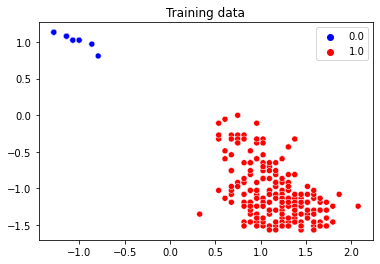

In [30]:
# training data
plt.title('Training data')
sns.scatterplot(x=X_train[:,0],
                y=X_train[:,1],
                hue=y_train,
                palette=['blue', 'red'])

<AxesSubplot:title={'center':'Test data'}>

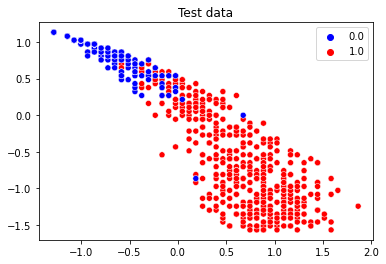

In [31]:
# test data
plt.title('Test data')
sns.scatterplot(x=X_test[:,0],
                y=X_test[:,1],
                hue=y_test,
                palette=['blue', 'red'])

In [35]:
# Single neuron classifier code from Problem 4 is probably needed to implement the Bayesian neuron

def sigmoid(a):
    return 1/(1+np.e**(-a))

def single_neuron(x, w):

    a = np.dot(x,w[1:]) + w[0]
    return sigmoid(a)

In [36]:
# Define the log prior, likelihood, posterior

def log_gaussian_prior(w):
    a_bar = 1
    cte = 1/((a_bar*np.pi*2)**0.5)
    norm_w = np.sum(w*w)
    exp = np.exp(-norm_w/(2*a_bar**2))
    np.seterr(divide = 'ignore') 
    resp=np.log(cte*exp)
    np.seterr(divide = 'warn') 
    return resp

def log_likelihood(w, x, y, dy=1):
    y_model = np.round(single_neuron(x, w))
    logL=-0.5 * np.sum(np.log(2 * np.pi * dy**2) + (y - y_model)**2 / dy**2)
    return logL

def log_posterior(w, x, y, dy=1):
    return log_gaussian_prior(w) + log_likelihood(w, x, y, dy=1)

**Sub-task (b)**: Train the Bayesian binary classifier and plot the pdf:s for the weights and bias.

In [54]:
def train(x, y, dy=1, k=4):
    min_theta=np.array([1,4,-0.5,-100,-100,-100,-100])[:k]
    max_theta=np.array([2,5,0.5,100,100,100,100])[:k]

    ndim = k  # number of parameters in the model
    nwalkers = 50  # number of MCMC walkers
    nburn = 1000  # "burn-in" period to let chains stabilize
    nsteps = 1000  # number of MCMC steps to take

    # we'll start at random locations within the prior volume
    starting_guesses = min_theta + max_theta * np.random.rand(nwalkers,ndim)
    

    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(x, y, dy))

    # "burn-in" period; save final positions and then reset
    pos, prob, state = sampler.run_mcmc(starting_guesses, nburn)
    sampler.reset()

    # sampling period
    sampler.run_mcmc(pos, nsteps)

    # discard burn-in points and flatten the walkers; the shape of samples is (nwalkers*nsteps, ndim)
    samples = sampler.chain.reshape((-1, ndim))
    return samples

In [55]:
sample = train(X_train, y_train,k=3)

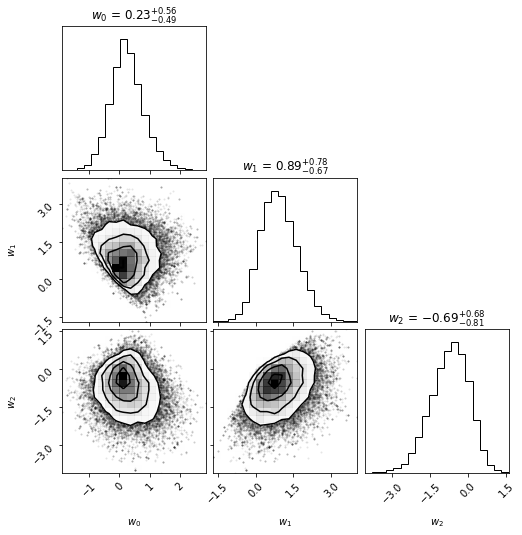

In [66]:
corner(sample, labels=["$w_0$" , "$w_1$", "$w_2$"], show_titles=True)
plt.show()

**Sub-task (c)**: Plot the decision boundaries for a few samples of the Bayesian binary classifier. Translate to an average decision boundary.

In [77]:
# grid
min1, max1 = X_test[:, 0].min()-1, X_test[:, 0].max()+1
min2, max2 = X_test[:, 1].min()-1, X_test[:, 1].max()+1

x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
xx, yy = np.meshgrid(x1grid, x2grid)

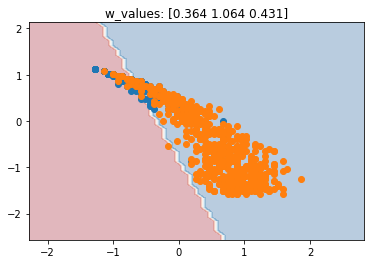

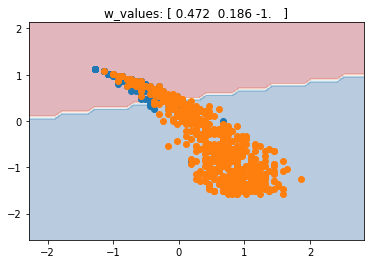

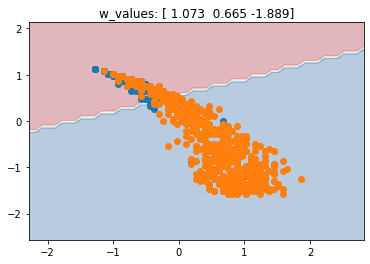

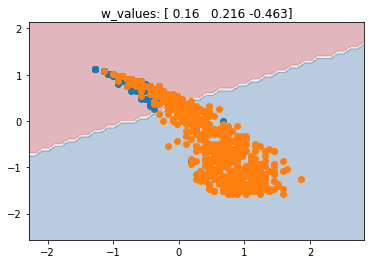

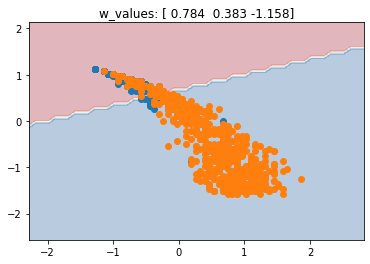

In [87]:
# some samples
for i in np.random.randint(0,sample.shape[0],5):
    w_final = sample[i,:]
    yhat = np.round(single_neuron(np.c_[xx.ravel(), yy.ravel()],w_final))
    # reshape the predictions back into a grid
    zz = yhat.reshape(xx.shape)
    # plot the grid of x, y and z values as a surface
    plt.title(f'w_values: {np.round(w_final,3)}')
    plt.contourf(xx, yy, zz,cmap=plt.cm.RdBu, alpha=0.3)
    # create scatter plot for samples from each class
    
    for class_value in range(2):
        # get row indexes for samples with this class
        row_ix = np.where(y_test == class_value)
        # create scatter of these samples
        plt.scatter(X_test[row_ix, 0], X_test[row_ix, 1], cmap=plt.cm.RdBu)
    plt.show()
    plt.close()

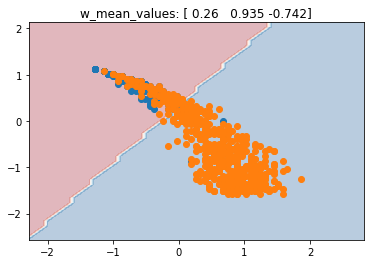

In [88]:
# avg des boundary
w_final = np.mean(sample,axis=0)
yhat = np.round(single_neuron(np.c_[xx.ravel(), yy.ravel()],w_final))
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
plt.title(f'w_mean_values: {np.round(w_final,3)}')
plt.contourf(xx, yy, zz,cmap=plt.cm.RdBu, alpha=0.3)
# create scatter plot for samples from each class

for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y_test == class_value)
    # create scatter of these samples
    plt.scatter(X_test[row_ix, 0], X_test[row_ix, 1], cmap=plt.cm.RdBu)
plt.show()
plt.close()

**Sub-task (d)**: Study in particular the **prediction** of your Bayesian binary classifier for inputs $(E,|m|)$ that corresponds to:
1. low-temperature configurations.
1. high-temperature configurations.
1. temperatures very close to the critical one.

In [96]:
# high temp
w_final = np.mean(sample,axis=0)
high_temp = input_data_scale[(T>3.5)]
y_high_temp = targets[(T>3.5)]
prediction = np.round(single_neuron(high_temp,w_final))

from sklearn.metrics import classification_report
print(classification_report(y_high_temp, prediction))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       220

    accuracy                           1.00       220
   macro avg       1.00      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220



In [97]:
# low temp
w_final = np.mean(sample,axis=0)
low_temp = input_data_scale[(T<1.5)]
y_low_temp = targets[(T<1.5)]
prediction = np.round(single_neuron(low_temp,w_final))

from sklearn.metrics import classification_report
print(classification_report(y_low_temp, prediction))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       180

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



In [102]:
# close to Tc temp
w_final = np.mean(sample,axis=0)
low_temp = input_data_scale[(Tc-Tc*0.1<T)&(T<Tc+Tc*0.1)]
y_low_temp = targets[(Tc-Tc*0.1<T)&(T<Tc+Tc*0.1)]
prediction = np.round(single_neuron(low_temp,w_final))

from sklearn.metrics import classification_report
print(classification_report(y_low_temp, prediction))

              precision    recall  f1-score   support

         0.0       0.66      0.97      0.78       100
         1.0       0.91      0.36      0.52        80

    accuracy                           0.70       180
   macro avg       0.78      0.67      0.65       180
weighted avg       0.77      0.70      0.66       180

